
## NLP: Ulta Skincare Reviews




## Dataset Information
This dataset was created via Python using the selenium and pandas libraries. The reviews were pulled on March 27, 2023 and were published on Ulta.com for Dermalogica products.

- The data can be found [here](https://www.kaggle.com/datasets/nenamalikah/nlp-ulta-skincare-reviews).

### Data Dictionary

```
- Review Title: The title of the review.
- Review_Text: The full text of the review.
- Verified_Buyer: Whether the reviewer is a verified buyer of the product.
- Review_Date: The date the review was published relative to the review scrape date.
- Review_Location: The location of the reviewer.
- Review_Upvotes: How many times the review was upvoted by other reviewers.
- Review_Downvotes: How many times the review was downvoted by other reviewers.
- Product: The name of the product the review was issued for.
- Brand: The brand of the product.
- Scrape Date: The date the data was pulled from the web.
```

### Objectives

```
1. Exploratory Data Analysis.

2. Research and experimentation.

3. Sentiments Analysis.

```

In [ ]:
# Built-in library
import itertools
import re
from typing import Any, Optional, Sequence, Union
import string

# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize as WordTokenizer
from nltk.sentiment import SentimentIntensityAnalyzer
import spacy


# pandas settings
pd.options.display.max_rows = 1_000
pd.options.display.max_columns = 1_000
pd.options.display.max_colwidth = 1_000


# Black code formatter (Optional)
#%load_ext lab_black

In [ ]:
stop_words = stopwords.words("english")

#### Loading the Data
Next, we will load the CSV files into our Python environment using the pandas library:

In [ ]:
df = pd.read_csv("Ulta Skincare Reviews.csv")
df.head()

,Review_Title,Review_Text,Verified_Buyer,Review_Date,Review_Location,Review_Upvotes,Review_Downvotes,Product,Brand,Scrape_Date
0,Perfect,Love using this on my face while in the shower. Heats up and gives a light scrub nicely,No,15 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
1,You need this,Even better than the daily microfoliant. I'm obsessed. My skin is SO MUCH smoother,No,27 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
2,Clean skin,Enjoy this product so much ! I look forward to using it - really feels great.,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
3,Love This Stuff!,I've never tried anything like this before and I love it. When you apply it to your face you get a little shot of warm that feels so good. The scrub seems very gritty but the only side effects I've encountered have been positive ones.,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
4,This exfoliates very nicely and,"This exfoliates very nicely and gives a very smooth skin after with no irritation and no reaction to the skin . I highly recommended it, i will buy it again.",No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23


## Data Exploration
In this section, we will explore the  dataset, restaurantsdata.csv, to gain a better understanding of their structure, contents, and quality. We will start by importing the necessary libraries, reading the data, and performing initial exploratory analysis.

In [ ]:
## Checking the info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4150 entries, 0 to 4149
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Review_Title      4150 non-null   object
 1   Review_Text       4148 non-null   object
 2   Verified_Buyer    4150 non-null   object
 3   Review_Date       4150 non-null   object
 4   Review_Location   4149 non-null   object
 5   Review_Upvotes    4150 non-null   int64 
 6   Review_Downvotes  4150 non-null   int64 
 7   Product           4150 non-null   object
 8   Brand             4150 non-null   object
 9   Scrape_Date       4150 non-null   object
dtypes: int64(2), object(8)
memory usage: 324.3+ KB


* There are 4150 rows and 10 columns in the data
* There are two missing values Review_Text column
* There is a missing value in Review_Location

#### Data Cleaning:Checking for Null Values
In the data cleaning step, we will handle any data quality issues such as  missing values. This ensures the accuracy and reliability of our analysis. Let's start by checking for null values in the datasets.



In [ ]:
df.drop(df.index[[3397, 3560, 3684, 3686]], axis=0, inplace=True)

In [ ]:
df.shape

(4146, 10)

## Copying the dataset
This is done to protect the main dataset and to avoid mix up so we won't end up loosing any data.

In [ ]:
dfcopy = df.copy()
dfcopy.shape

(4146, 10)

###### EDA:     
 It involves examining and visualizing the dataset to gain a deeper understanding of its characteristics and patterns

IndexError: ignored

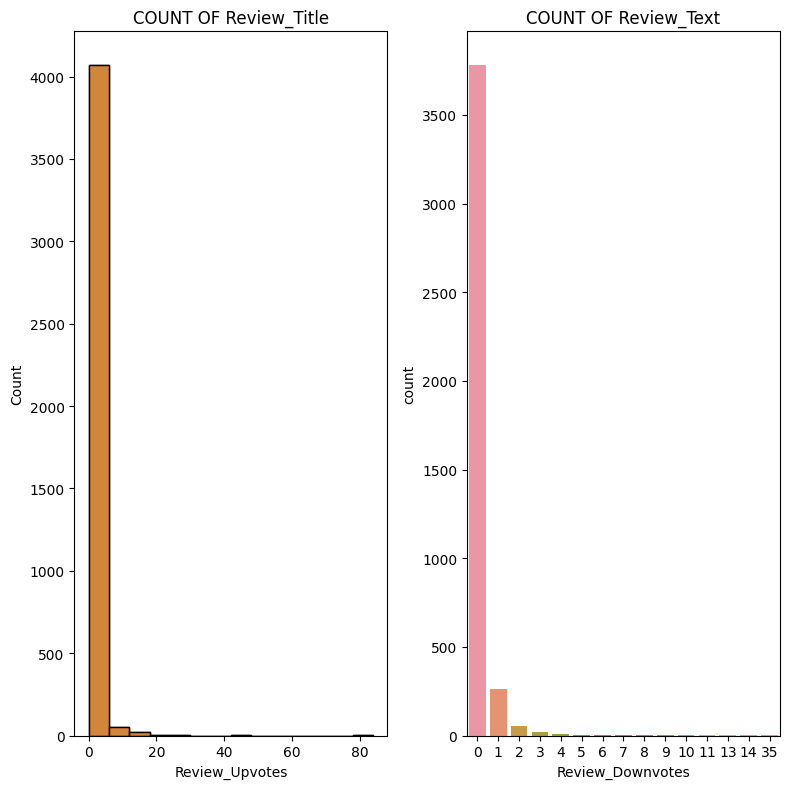

In [ ]:
f, axs = plt.subplots(1, 2, figsize=(8, 8))
for idx, feat in enumerate(dfcopy.columns):
    ax = axs[idx]
    sns.histplot(data=dfcopy, x="Review_Upvotes", ax=axs[0])
    sns.countplot(data=dfcopy, x="Review_Downvotes", ax=axs[1])
    ax.set_title(f"COUNT OF {feat}")
    f.tight_layout()

In [ ]:
feat = "Review_Upvotes"
condalist = [(dfcopy[feat] == 0), (dfcopy[feat] > 0)]
choicelist = ["0", ">0"]
dfcopy[feat] = np.select(condlist=condalist, choicelist=choicelist)
dfcopy[feat].value_counts(normalize=True)

0     0.758562
>0    0.241438
Name: Review_Upvotes, dtype: float64

In [ ]:
feature = "Review_Downvotes"
var = [(dfcopy["Review_Downvotes"] == 0), dfcopy["Review_Downvotes"] > 0]
new_var = ["0", ">0"]
dfcopy[feature] = np.select(condlist=var, choicelist=new_var)
dfcopy[feature].value_counts(normalize=True)

0     0.912205
>0    0.087795
Name: Review_Downvotes, dtype: float64

Text(0.5, 0.98, 'EDA of the Upvotes')

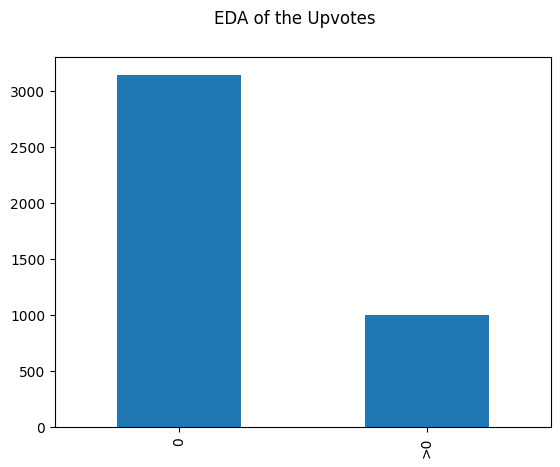

In [ ]:
dfcopy.Review_Upvotes.value_counts().plot(kind="bar")
plt.suptitle("EDA of the Upvotes")

Text(0.5, 0.98, 'EDA of the Downvotes')

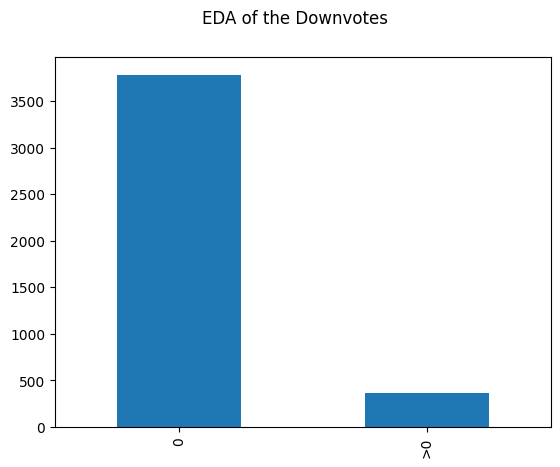

In [ ]:
dfcopy.Review_Downvotes.value_counts().plot(kind="bar")
plt.suptitle("EDA of the Downvotes")


The above bar plots display the distribution of Review upvotes and the count of people who are in favor and against the upvotes. Similarly, the bar plot also represents the distribution for the Downvote feature.To prevent outliers and overfitting, I have discretized the Review_Downvotes and Review_Upvotes into two categories: 0 and >0. This approach helps in creating a more robust analysis and modeling process.






# Sentiment Analysis to determine the polarity of text :      
Sentiment analysis enables us to derive meaningful insights from vast amounts of text data, providing a deeper understanding of human emotions and opinions, which can be used to improve products, services, and decision-making processes.

In [ ]:
# Sentiment Intensity Analyzer
sia = SentimentIntensityAnalyzer()
dfcopy["score"] = dfcopy["Review_Text"].apply(lambda x: sia.polarity_scores(x))
dfcopy.head()

,Review_Title,Review_Text,Verified_Buyer,Review_Date,Review_Location,Review_Upvotes,Review_Downvotes,Product,Brand,Scrape_Date,score
0,Perfect,Love using this on my face while in the shower. Heats up and gives a light scrub nicely,No,15 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,"{'neg': 0.0, 'neu': 0.679, 'pos': 0.321, 'compound': 0.7964}"
1,You need this,Even better than the daily microfoliant. I'm obsessed. My skin is SO MUCH smoother,No,27 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,"{'neg': 0.102, 'neu': 0.723, 'pos': 0.175, 'compound': 0.296}"
2,Clean skin,Enjoy this product so much ! I look forward to using it - really feels great.,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,"{'neg': 0.0, 'neu': 0.583, 'pos': 0.417, 'compound': 0.8347}"
3,Love This Stuff!,I've never tried anything like this before and I love it. When you apply it to your face you get a little shot of warm that feels so good. The scrub seems very gritty but the only side effects I've encountered have been positive ones.,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,"{'neg': 0.031, 'neu': 0.749, 'pos': 0.22, 'compound': 0.8636}"
4,This exfoliates very nicely and,"This exfoliates very nicely and gives a very smooth skin after with no irritation and no reaction to the skin . I highly recommended it, i will buy it again.",No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,"{'neg': 0.227, 'neu': 0.618, 'pos': 0.156, 'compound': -0.343}"


Polarity Scoring this tool provides a continuous polarity score, allowing for more nuanced analysis of sentiment rather than just binary positive/negative classification. That is what we have as score.

In [ ]:
dfcopy["compound"] = dfcopy["score"].apply(lambda x: x["compound"])
dfcopy.head()

,Review_Title,Review_Text,Verified_Buyer,Review_Date,Review_Location,Review_Upvotes,Review_Downvotes,Product,Brand,Scrape_Date,score,compound
0,Perfect,Love using this on my face while in the shower. Heats up and gives a light scrub nicely,No,15 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,"{'neg': 0.0, 'neu': 0.679, 'pos': 0.321, 'compound': 0.7964}",0.7964
1,You need this,Even better than the daily microfoliant. I'm obsessed. My skin is SO MUCH smoother,No,27 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,"{'neg': 0.102, 'neu': 0.723, 'pos': 0.175, 'compound': 0.296}",0.2960
2,Clean skin,Enjoy this product so much ! I look forward to using it - really feels great.,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,"{'neg': 0.0, 'neu': 0.583, 'pos': 0.417, 'compound': 0.8347}",0.8347
3,Love This Stuff!,I've never tried anything like this before and I love it. When you apply it to your face you get a little shot of warm that feels so good. The scrub seems very gritty but the only side effects I've encountered have been positive ones.,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,"{'neg': 0.031, 'neu': 0.749, 'pos': 0.22, 'compound': 0.8636}",0.8636
4,This exfoliates very nicely and,"This exfoliates very nicely and gives a very smooth skin after with no irritation and no reaction to the skin . I highly recommended it, i will buy it again.",No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,"{'neg': 0.227, 'neu': 0.618, 'pos': 0.156, 'compound': -0.343}",-0.3430


The compound score takes into account the intensity of these polarities and provides a more comprehensive sentiment evaluation for the entire text.A compound score of +1 indicates a highly positive sentiment, while compound score of -1 indicates a highly negative sentiment and compound score of 0 indicates a neutral sentiment.The compound score is useful when you need a single numeric representation of the overall sentiment of a text. It provides a convenient way to compare sentiments across different texts or to filter and classify texts based on their overall emotional tone.

In [ ]:
# splitting the polarity score into sentiment with positive and negative
dfcopy["sentiment"] = dfcopy["compound"].apply(lambda c: "pos" if c >= 0 else "neg")

dfcopy.head()

,Review_Title,Review_Text,Verified_Buyer,Review_Date,Review_Location,Review_Upvotes,Review_Downvotes,Product,Brand,Scrape_Date,score,compound,sentiment
0,Perfect,Love using this on my face while in the shower. Heats up and gives a light scrub nicely,No,15 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,"{'neg': 0.0, 'neu': 0.679, 'pos': 0.321, 'compound': 0.7964}",0.7964,pos
1,You need this,Even better than the daily microfoliant. I'm obsessed. My skin is SO MUCH smoother,No,27 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,"{'neg': 0.102, 'neu': 0.723, 'pos': 0.175, 'compound': 0.296}",0.2960,pos
2,Clean skin,Enjoy this product so much ! I look forward to using it - really feels great.,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,"{'neg': 0.0, 'neu': 0.583, 'pos': 0.417, 'compound': 0.8347}",0.8347,pos
3,Love This Stuff!,I've never tried anything like this before and I love it. When you apply it to your face you get a little shot of warm that feels so good. The scrub seems very gritty but the only side effects I've encountered have been positive ones.,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,"{'neg': 0.031, 'neu': 0.749, 'pos': 0.22, 'compound': 0.8636}",0.8636,pos
4,This exfoliates very nicely and,"This exfoliates very nicely and gives a very smooth skin after with no irritation and no reaction to the skin . I highly recommended it, i will buy it again.",No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,"{'neg': 0.227, 'neu': 0.618, 'pos': 0.156, 'compound': -0.343}",-0.3430,neg


In [ ]:
dfcopy.loc[dfcopy["sentiment"] == "neg", "sentiment"] = 0
dfcopy.loc[dfcopy["sentiment"] == "pos", "sentiment"] = 1
dfcopy["sentiment"].value_counts(normalize=True)

1    0.944284
0    0.055716
Name: sentiment, dtype: float64

A Compound score greater than 0 denotes a positive sentiment, while a score less than 0 signifies a negative sentiment. This information illustrates the distribution between positive(1) and negative (0) sentiments.

#### Removing of stopwords
Stopwords are common words that occur frequently in a language but carry little or no meaningful information about the content of the text. Examples of stopwords in English include "the," "is," "and," "are," "to," "in," etc

In [ ]:
## cleaning with regexr
def clean_text(data):
    # remove punctuation
    data = re.sub(r"[^\w\s]", " ", data)
    data = data.strip()
    data = re.sub("\s+", " ", data)
    return data

In [ ]:
dfcopy["cleaning_text"] = dfcopy["Review_Text"].apply(lambda x: clean_text(x.lower()))

#### Dropping Duplicates
Duplicate records can skew our analysis and produce inaccurate results. We will identify and remove any duplicate entries from the datasets.

In [ ]:
## dropping duplicates on the review text
dfcopy.drop_duplicates(subset="cleaning_text", keep="first", inplace=True)
dfcopy.head()

,Review_Title,Review_Text,Verified_Buyer,Review_Date,Review_Location,Review_Upvotes,Review_Downvotes,Product,Brand,Scrape_Date,score,compound,sentiment,cleaning_text
0,Perfect,Love using this on my face while in the shower. Heats up and gives a light scrub nicely,No,15 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,"{'neg': 0.0, 'neu': 0.679, 'pos': 0.321, 'compound': 0.7964}",0.7964,1,love using this on my face while in the shower heats up and gives a light scrub nicely
1,You need this,Even better than the daily microfoliant. I'm obsessed. My skin is SO MUCH smoother,No,27 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,"{'neg': 0.102, 'neu': 0.723, 'pos': 0.175, 'compound': 0.296}",0.2960,1,even better than the daily microfoliant i m obsessed my skin is so much smoother
2,Clean skin,Enjoy this product so much ! I look forward to using it - really feels great.,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,"{'neg': 0.0, 'neu': 0.583, 'pos': 0.417, 'compound': 0.8347}",0.8347,1,enjoy this product so much i look forward to using it really feels great
3,Love This Stuff!,I've never tried anything like this before and I love it. When you apply it to your face you get a little shot of warm that feels so good. The scrub seems very gritty but the only side effects I've encountered have been positive ones.,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,"{'neg': 0.031, 'neu': 0.749, 'pos': 0.22, 'compound': 0.8636}",0.8636,1,i ve never tried anything like this before and i love it when you apply it to your face you get a little shot of warm that feels so good the scrub seems very gritty but the only side effects i ve encountered have been positive ones
4,This exfoliates very nicely and,"This exfoliates very nicely and gives a very smooth skin after with no irritation and no reaction to the skin . I highly recommended it, i will buy it again.",No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,"{'neg': 0.227, 'neu': 0.618, 'pos': 0.156, 'compound': -0.343}",-0.3430,0,this exfoliates very nicely and gives a very smooth skin after with no irritation and no reaction to the skin i highly recommended it i will buy it again


By removing stop words and duplicate words, we have effectively eliminated noise from our data, leading to an enhancement in the accuracy of our model.

##### Lemmatizing
This process involves reducing words to their base or root form, it ensures that variations of a word are treated as the same word, enabling more consistent and accurate analysis.

In [ ]:
lemmatizer = WordNetLemmatizer()

In [ ]:
nlp = spacy.load("en_core_web_sm")

In [ ]:
def lemmatization(text):
    doc = nlp(text)
    tokens = [
        token.lemma_.lower()
        for token in doc
        if not token.is_stop and not token.is_punct
    ]
    return " ".join(tokens)


dfcopy["cleaned_ReviewTxt"] = dfcopy["cleaning_text"].apply(lemmatization)
dfcopy.head()

,Review_Title,Review_Text,Verified_Buyer,Review_Date,Review_Location,Review_Upvotes,Review_Downvotes,Product,Brand,Scrape_Date,score,compound,sentiment,cleaning_text,cleaned_ReviewTxt
0,Perfect,Love using this on my face while in the shower. Heats up and gives a light scrub nicely,No,15 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,"{'neg': 0.0, 'neu': 0.679, 'pos': 0.321, 'compound': 0.7964}",0.7964,1,love using this on my face while in the shower heats up and gives a light scrub nicely,love face shower heat give light scrub nicely
1,You need this,Even better than the daily microfoliant. I'm obsessed. My skin is SO MUCH smoother,No,27 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,"{'neg': 0.102, 'neu': 0.723, 'pos': 0.175, 'compound': 0.296}",0.2960,1,even better than the daily microfoliant i m obsessed my skin is so much smoother,well daily microfoliant m obsess skin smooth
2,Clean skin,Enjoy this product so much ! I look forward to using it - really feels great.,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,"{'neg': 0.0, 'neu': 0.583, 'pos': 0.417, 'compound': 0.8347}",0.8347,1,enjoy this product so much i look forward to using it really feels great,enjoy product look forward feel great
3,Love This Stuff!,I've never tried anything like this before and I love it. When you apply it to your face you get a little shot of warm that feels so good. The scrub seems very gritty but the only side effects I've encountered have been positive ones.,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,"{'neg': 0.031, 'neu': 0.749, 'pos': 0.22, 'compound': 0.8636}",0.8636,1,i ve never tried anything like this before and i love it when you apply it to your face you get a little shot of warm that feels so good the scrub seems very gritty but the only side effects i ve encountered have been positive ones,ve try like love apply face little shot warm feel good scrub gritty effect ve encounter positive one
4,This exfoliates very nicely and,"This exfoliates very nicely and gives a very smooth skin after with no irritation and no reaction to the skin . I highly recommended it, i will buy it again.",No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,"{'neg': 0.227, 'neu': 0.618, 'pos': 0.156, 'compound': -0.343}",-0.3430,0,this exfoliates very nicely and gives a very smooth skin after with no irritation and no reaction to the skin i highly recommended it i will buy it again,exfoliate nicely give smooth skin irritation reaction skin highly recommend buy


All the words have being broken down to their root form for language simplification and better generalization

###  Qs 1. Explore the data. What can the reviews tell us about the products? Do most buyers have common skincare issues? What issues did the products help solve or exacerbate?


*  The dataset reveals numerous benefits of using Dermalogica products. Users have reported positive experiences, including effective facial cleansing, exfoliation, and smoother skin. As a result, Dermalogica garners a positive reputation for its ability to address various skin concerns and satisfy users' needs.

###  Qs 2. Create a wordcloud showing the words/phrases commonly associated with each product.

In [ ]:
Superfoliant = " ".join(
    Review for Review in df[df["Product"] == "Daily Superfoliant"].Review_Text
)
Microfoliant = " ".join(
    Review for Review in df[df["Product"] == "Daily Microfoliant"].Review_Text
)
Exfoliant = " ".join(
    Review for Review in df[df["Product"] == "Hydro Masque Exfoliant"].Review_Text
)
Thermafoliant = " ".join(
    Review for Review in df[df["Product"] == "Multi-Vitamin Thermafoliant"].Review_Text
)

In [ ]:
## import worldcloud,imagecolorgenerator
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

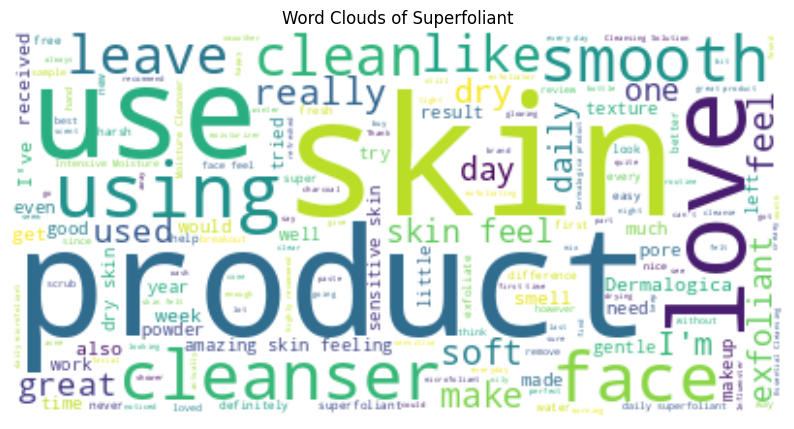

In [ ]:
Superfoliant_ = WordCloud(
    stopwords=stop_words, background_color="white", max_words=3000
).generate(Superfoliant)
plt.figure(figsize=[10, 8])
plt.imshow(Superfoliant_, interpolation="bilinear")
plt.axis("off")
plt.title("Word Clouds of Superfoliant")
plt.show()

## Commonly used words are :
* Products
* Love
* Smooth
* CLean
* Exfoliate  

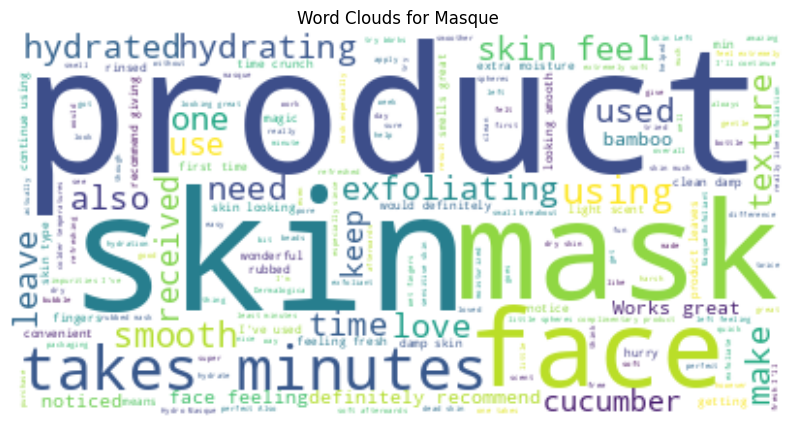

In [ ]:
Masque = WordCloud(
    stopwords=stop_words, background_color="white", max_words=3000
).generate(Exfoliant)
plt.figure(figsize=[10, 8])
plt.imshow(Masque, interpolation="bilinear")
plt.axis("off")
plt.title("Word Clouds for Masque")
plt.show()

## Commonly used words for Masque are :
* Products
* Skin
* Mask
* CLean


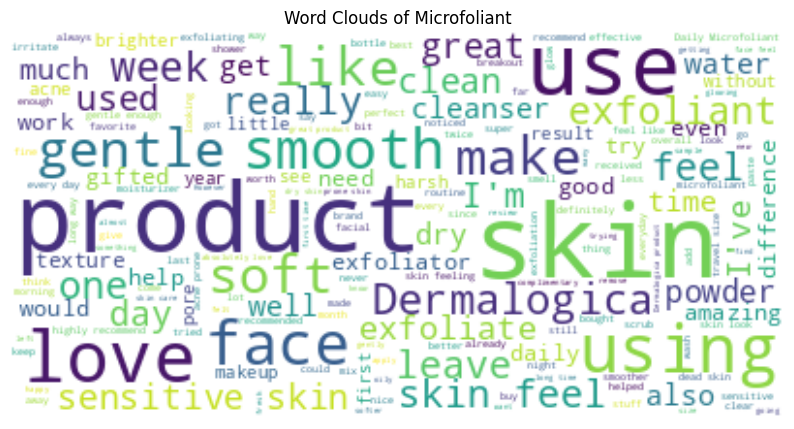

In [ ]:
Microfoliant_ = WordCloud(
    stopwords=stop_words, background_color="white", max_words=1000
).generate(Microfoliant)
plt.figure(figsize=[10, 8])
plt.imshow(Microfoliant_, interpolation="bilinear")
plt.axis("off")
plt.title("Word Clouds of Microfoliant")
plt.show()

## Commonly used words for Masque are :
* Products
* Skin
* Mask
* CLean

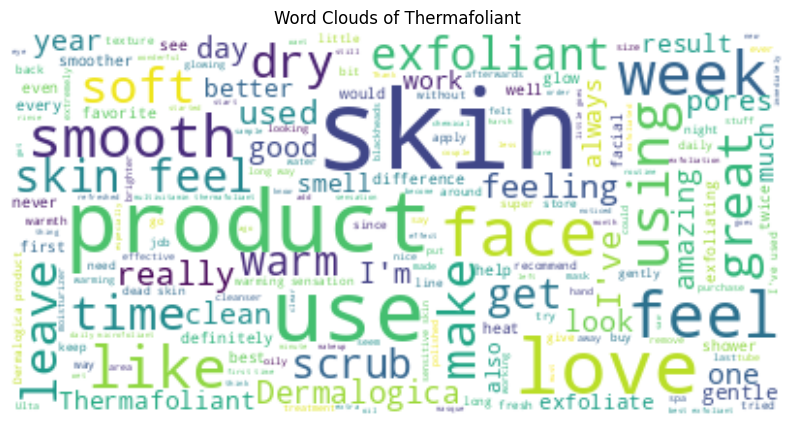

In [ ]:
Thermafoliant_ = WordCloud(
    stopwords=stop_words, background_color="white", max_words=1000
).generate(Thermafoliant)
plt.figure(figsize=[10, 8])
plt.imshow(Thermafoliant_, interpolation="bilinear")
plt.axis("off")
plt.title("Word Clouds of Thermafoliant")
plt.show()

## Commonly used words for Masque are :
* Product
* Love
* Skin
* Face
* CLean

### Qs 3. Perform sentiment analysis. Build a ML model that can predict whether a review is positive or negative.

In [ ]:
# importing tfidf
from sklearn.feature_extraction.text import TfidfVectorizer
# Using Tfidf Function
tfidf_vec = TfidfVectorizer()
# Fit
tfidf_vec.fit(dfcopy["cleaned_ReviewTxt"])
# Transform
vector = tfidf_vec.transform(dfcopy["cleaned_ReviewTxt"])
vector

<3638x3874 sparse matrix of type '<class 'numpy.float64'>'
	with 65494 stored elements in Compressed Sparse Row format>

In [ ]:
print(vector)

  (0, 3073)	0.3640684458421984
  (0, 2980)	0.31264130588503414
  (0, 2269)	0.44599371356293865
  (0, 2012)	0.16633589398848417
  (0, 1946)	0.39666282731969754
  (0, 1612)	0.4851040336062284
  (0, 1490)	0.33757227176501375
  (0, 1270)	0.19107380188570258
  (1, 3774)	0.42070817686110334
  (1, 3152)	0.2721802795964434
  (1, 3112)	0.1508760224956125
  (1, 2318)	0.6600225128113755
  (1, 2126)	0.42710991301433915
  (1, 831)	0.3287953101003011
  (2, 2637)	0.193771846385293
  (2, 1993)	0.33039331435299374
  (2, 1545)	0.31276104694409607
  (2, 1412)	0.6602879263417624
  (2, 1315)	0.21308727146054676
  (2, 1140)	0.5235331183053331
  (3, 3741)	0.2490502285524326
  (3, 3697)	0.29468823701325336
  (3, 3592)	0.14514089453805273
  (3, 3067)	0.3515259478122475
  (3, 2980)	0.19078622775393525
  :	:
  (3636, 2850)	0.33410803835879516
  (3636, 2637)	0.07513910520818211
  (3636, 1883)	0.20019945733386862
  (3636, 1598)	0.22961906175562385
  (3636, 1490)	0.183182155352836
  (3636, 1471)	0.12321181596900871

In [ ]:
# word count and it values
word_vocab = {idx: key for key, idx in tfidf_vec.vocabulary_.items()}
word_vocab

{2012: 'love',
 1270: 'face',
 3073: 'shower',
 1612: 'heat',
 1490: 'give',
 1946: 'light',
 2980: 'scrub',
 2269: 'nicely',
 3774: 'well',
 831: 'daily',
 2126: 'microfoliant',
 2318: 'obsess',
 3112: 'skin',
 3152: 'smooth',
 1140: 'enjoy',
 2637: 'product',
 1993: 'look',
 1412: 'forward',
 1315: 'feel',
 1545: 'great',
 3697: 've',
 3592: 'try',
 1951: 'like',
 241: 'apply',
 1972: 'little',
 3067: 'shot',
 3741: 'warm',
 1517: 'good',
 1554: 'gritty',
 1100: 'effect',
 1131: 'encounter',
 2566: 'positive',
 2350: 'one',
 1225: 'exfoliate',
 1831: 'irritation',
 2722: 'reaction',
 1640: 'highly',
 2751: 'recommend',
 506: 'buy',
 3678: 'use',
 3780: 'wet',
 1066: 'dry',
 755: 'control',
 78: 'abrasive',
 1922: 'leave',
 3170: 'soft',
 1057: 'drench',
 3726: 'vitamin',
 81: 'absolutely',
 3589: 'truly',
 2221: 'multivitamin',
 3468: 'thermafoliant',
 3848: 'year',
 1584: 'happy',
 2672: 'purchase',
 993: 'directly',
 1990: 'long',
 290: 'available',
 3616: 'ulta',
 3292: 'store',
 

## Building the model

In [ ]:
## Using sklearn to build the model

In [ ]:
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    precision_score,
    recall_score,
)
from sklearn.linear_model import LogisticRegression

In [ ]:
# vector is cleaned_ReviewTxt
X = dfcopy["cleaned_ReviewTxt"]
y = dfcopy["sentiment"].astype("int")
X_train, X_test, y_train, y_test = train_test_split(vector, y, test_size=0.2)
X_train.shape, y_train.shape

((2910, 3874), (2910,))

In [ ]:
log = LogisticRegression()
model = log.fit(X_train, y_train)


In [ ]:
y_pred1 = model.predict(X_test)
y_pred1, print(y_pred1.shape)

(728,)


(array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [ ]:
accuracy_testing = accuracy_score(y_test, y_pred1)
print("Accuracy: ", accuracy_testing * 100, "%")
print("Confusion Matrix testing : ")

print(confusion_matrix(y_test, y_pred1))
print("Classification report testing: ")
print(classification_report(y_test, y_pred1))

Accuracy:  92.9945054945055 %
Confusion Matrix testing : 
[[  0  51]
 [  0 677]]
Classification report testing: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        51
           1       0.93      1.00      0.96       677

    accuracy                           0.93       728
   macro avg       0.46      0.50      0.48       728
weighted avg       0.86      0.93      0.90       728



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test accuracy prediction came out with 94.6%, the precision of the model shows 0 have no false positives,recall shows that the model predicts 1 to have no false negatives. Macro and Weighted avrages have a little imbalance  